WBG DATA- firsst encoding categorical data

(58725, 19)
[nan  0.  1.  2.  3.]
[nan  0.  1.  2.  3.]
(25485, 16)
Number of components for 90% variance: 9
Number of components for 95% variance: 10
Explained variance ratio per component:
[3.15195906e-01 1.58112861e-01 9.50334652e-02 6.65283892e-02
 6.39176088e-02 6.28480129e-02 6.23516139e-02 6.21145941e-02
 5.86385649e-02 4.09809954e-02 1.41191159e-02 1.58873207e-04
 8.33949766e-17 3.39885111e-17 0.00000000e+00 0.00000000e+00]


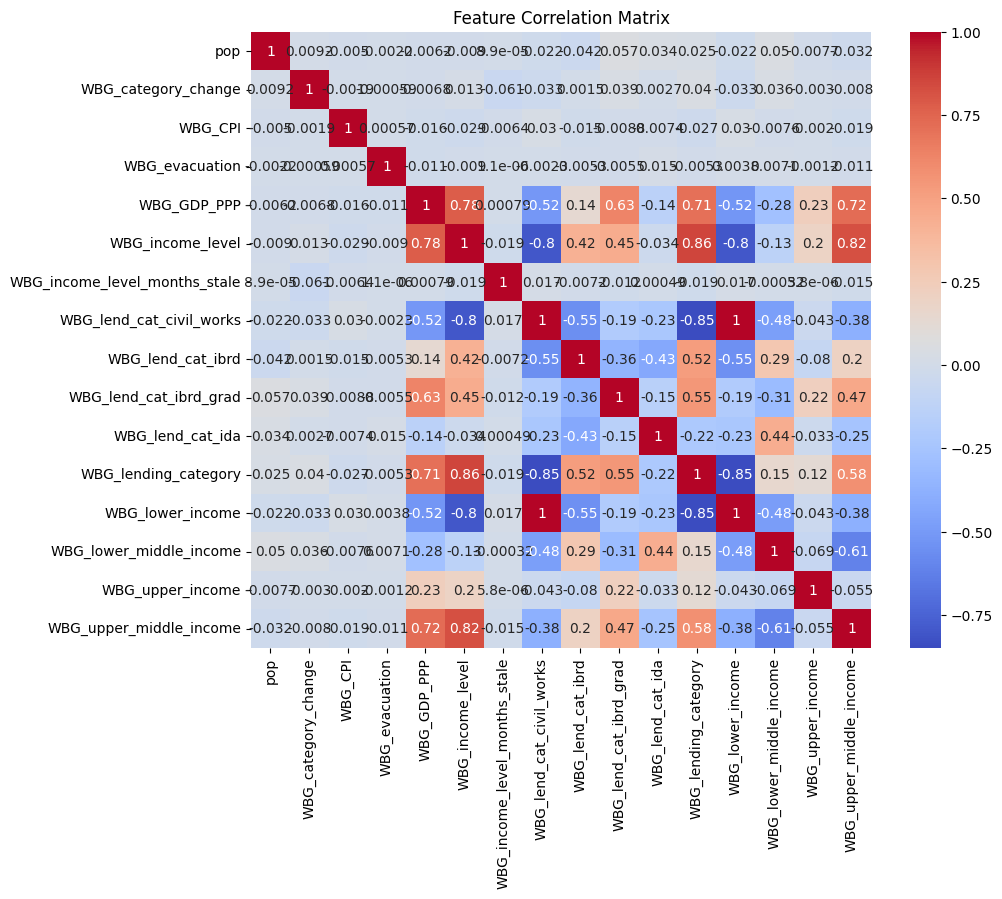

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

# Load data
df = pd.read_csv('WBG.csv')
print(df.shape)
# Drop non-numeric/categorical identifiers
df_clean = df.drop(columns=['iso3', 'yearmon', 'region_code'] )

# Step 1: Keep binary columns as-is (don't fill NaNs)
binary_cols = [
    'WBG_lend_cat_civil_works',
    'WBG_lend_cat_ibrd',
    'WBG_lend_cat_ibrd_grad',
    'WBG_lend_cat_ida'
]

# Step 2: Encode categorical ordinal features (preserving NaNs)
categorical_cols = ['WBG_income_level', 'WBG_lending_category']
import pandas as pd

# Sample map based on your earlier values [1, 2, 3, 4]
income_level_map = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}
lending_category_map = {1.0: 0, 2.0: 1, 3.0: 2, 4.0: 3}

# Apply mapping while preserving NaNs
df['WBG_income_level'] = df['WBG_income_level'].map(income_level_map)
df['WBG_lending_category'] = df['WBG_lending_category'].map(lending_category_map)

print(df['WBG_income_level'].unique())
print(df['WBG_lending_category'].unique())



# Drop rows with missing values
df_clean = df_clean.dropna()
print(df_clean.shape)
# Standardize data (mean=0, std=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

# Fit PCA with all components on scaled data
pca = PCA()
pca.fit(scaled_data)

# Calculate cumulative explained variance ratio
cum_variance = np.cumsum(pca.explained_variance_ratio_)

# Find number of components to reach 90% and 95% variance
n_components_90 = np.argmax(cum_variance >= 0.90) + 1
n_components_95 = np.argmax(cum_variance >= 0.95) + 1

print(f"Number of components for 90% variance: {n_components_90}")
print(f"Number of components for 95% variance: {n_components_95}")

print("Explained variance ratio per component:")
print(pca.explained_variance_ratio_)

# Plot correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


EACH FEATURE LOADING 

Feature loadings on principal components:
                                    PC1       PC2       PC3       PC4  \
pop                            0.003403  0.024060  0.147100  0.120438   
WBG_category_change            0.013112  0.022697  0.046995  0.707507   
WBG_CPI                       -0.015879 -0.009757 -0.009816  0.069300   
WBG_evacuation                -0.004282  0.010048  0.019757 -0.022461   
WBG_GDP_PPP                    0.359505 -0.237537  0.122541 -0.038163   
WBG_income_level               0.428939 -0.061350  0.021480 -0.030967   
WBG_income_level_months_stale -0.009577 -0.002760 -0.005609 -0.679703   
WBG_lend_cat_civil_works      -0.386705 -0.302645 -0.074826  0.017680   
WBG_lend_cat_ibrd              0.218296  0.267466 -0.594728  0.017633   
WBG_lend_cat_ibrd_grad         0.220502 -0.353573  0.362987  0.054144   
WBG_lend_cat_ida              -0.045331  0.294539  0.598891 -0.093327   
WBG_lending_category           0.425380  0.038809 -0.037702  0.036837   
WBG_lower

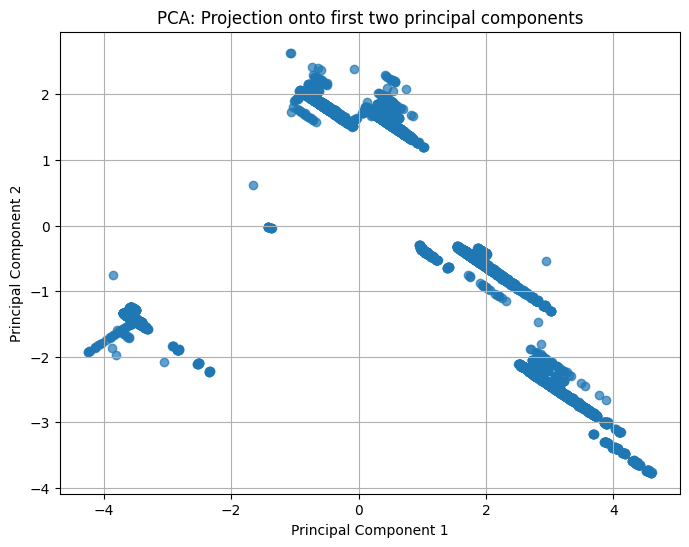

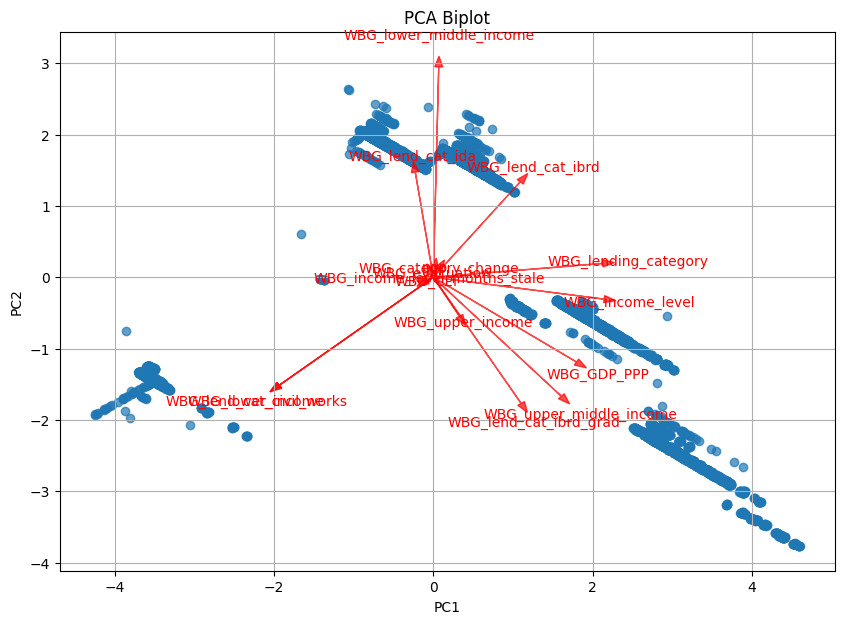

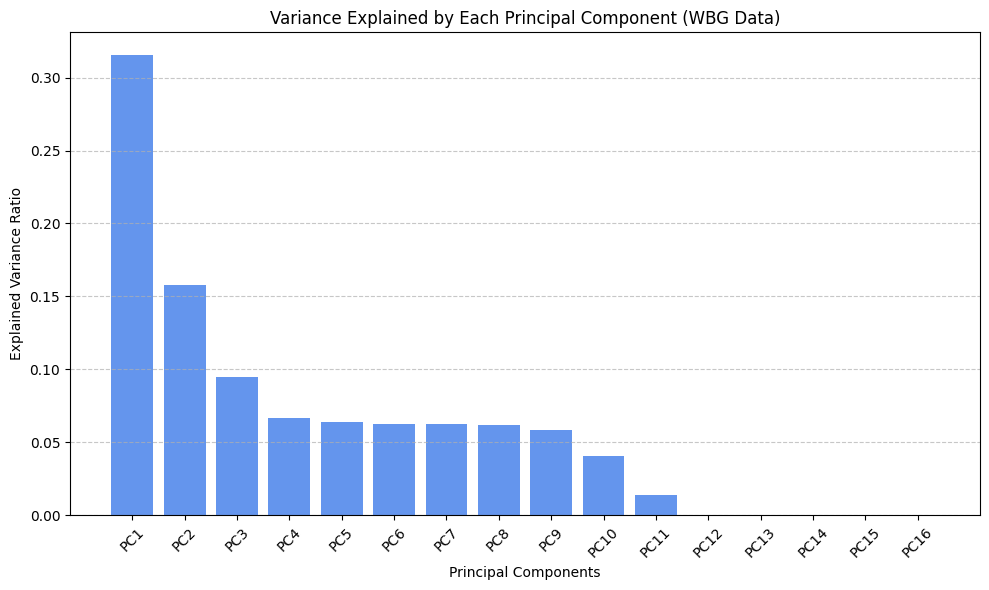

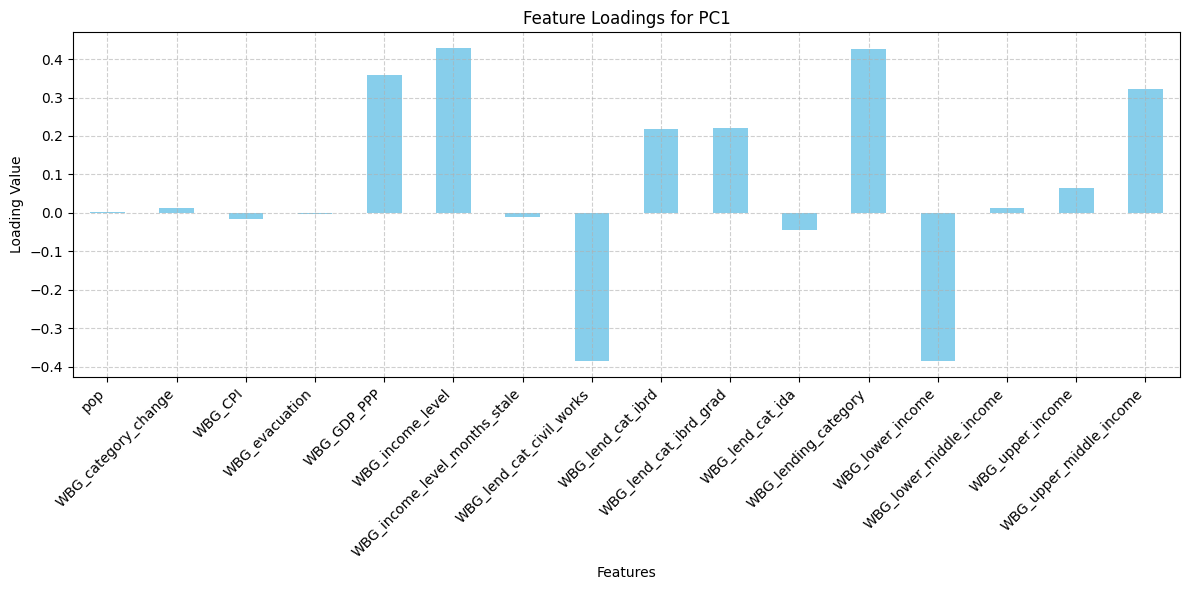

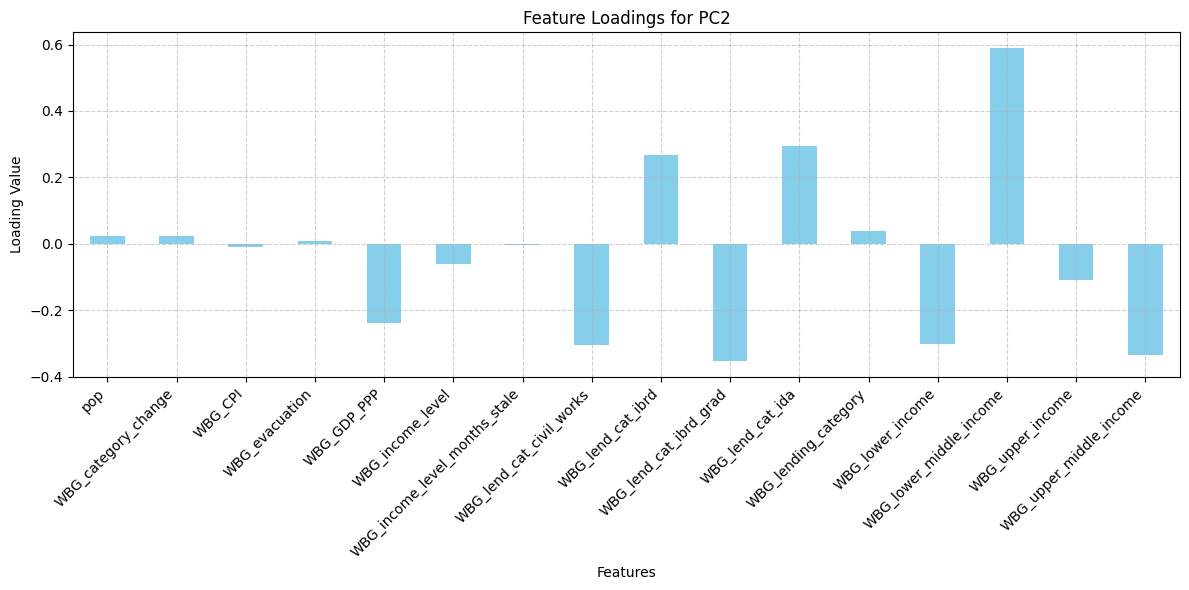

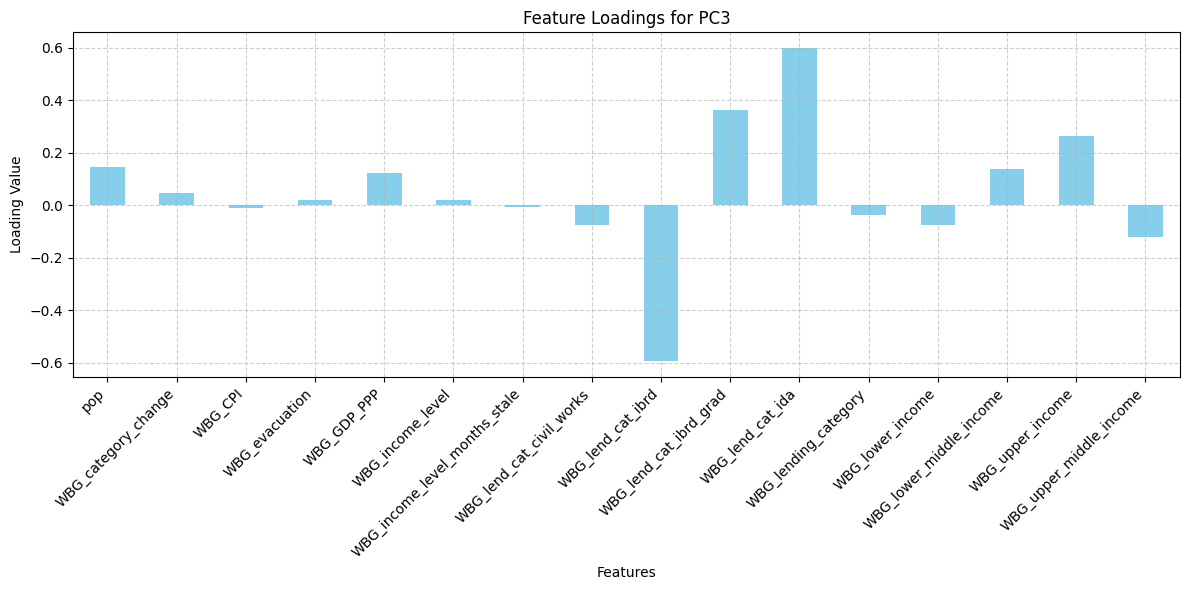

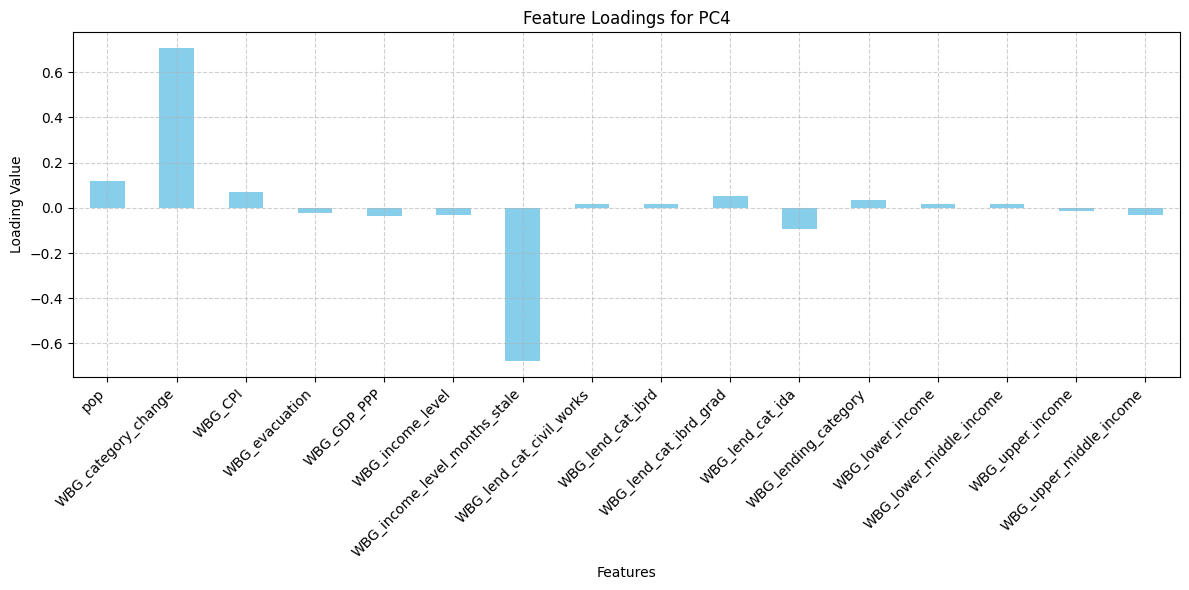

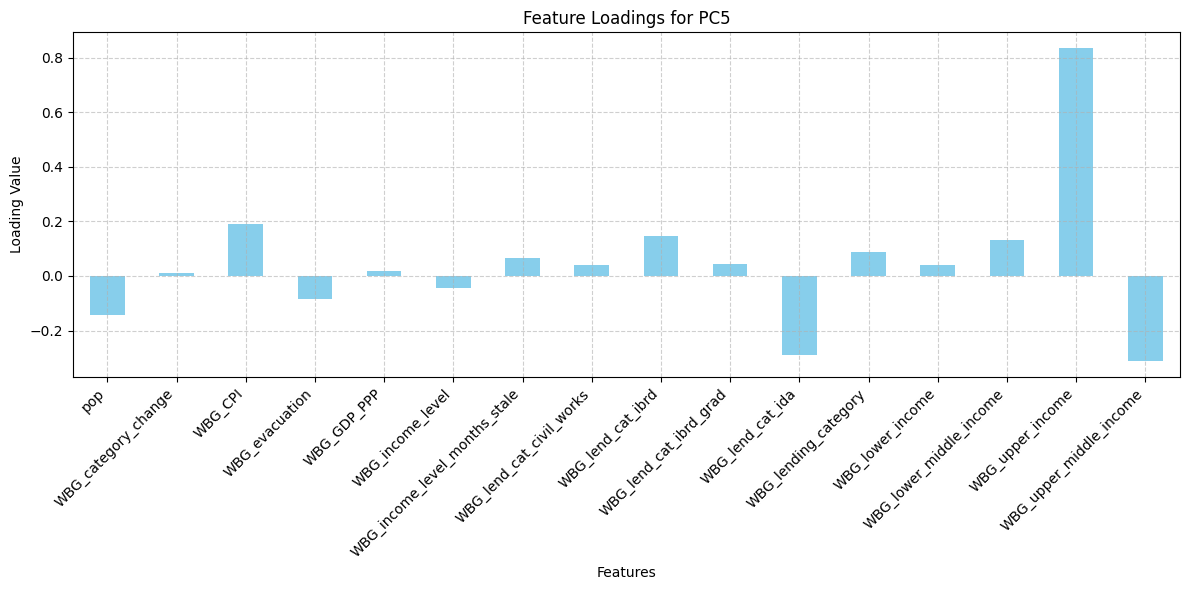

In [3]:


import matplotlib.pyplot as plt

import pandas as pd

# pca.components_ is shape (n_components, n_features)
# Each row is a PC, each column is a feature loading

loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=df_clean.columns)

print("Feature loadings on principal components:")
print(loadings)

# Project data onto first two PCs
pc_scores = pca.transform(scaled_data)  # shape (n_samples, n_components)

plt.figure(figsize=(8,6))
plt.scatter(pc_scores[:,0], pc_scores[:,1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Projection onto first two principal components')
plt.grid(True)
plt.show()


def biplot(scores, loadings, labels=None):
    plt.figure(figsize=(10,7))
    xs = scores[:,0]
    ys = scores[:,1]
    plt.scatter(xs, ys, alpha=0.7)

    for i, feature in enumerate(loadings.index):
        plt.arrow(0, 0, loadings.iloc[i, 0]*5, loadings.iloc[i, 1]*5, 
                  color='r', alpha=0.7, head_width=0.1)
        plt.text(loadings.iloc[i, 0]*5*1.15, loadings.iloc[i, 1]*5*1.15, feature, 
                 color='r', ha='center', va='center')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Biplot')
    plt.grid(True)
    plt.show()

biplot(pc_scores, loadings[['PC1', 'PC2']])


# Bar plot showing explained variance ratio per PC
plt.figure(figsize=(10, 6))
plt.bar(x=[f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))],
        height=pca.explained_variance_ratio_,
        color='cornflowerblue')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Variance Explained by Each Principal Component (WBG Data)')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Number of PCs to visualize (e.g., top 5)
num_pcs_to_plot = 5

# Plot bar graphs for each PC
for i in range(num_pcs_to_plot):
    pc = f'PC{i+1}'
    plt.figure(figsize=(12, 6))
    loadings[pc].plot(kind='bar', color='skyblue')
    plt.title(f'Feature Loadings for {pc}')
    plt.xlabel('Features')
    plt.ylabel('Loading Value')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    

Cumulative explained variance at component 5: 0.6988


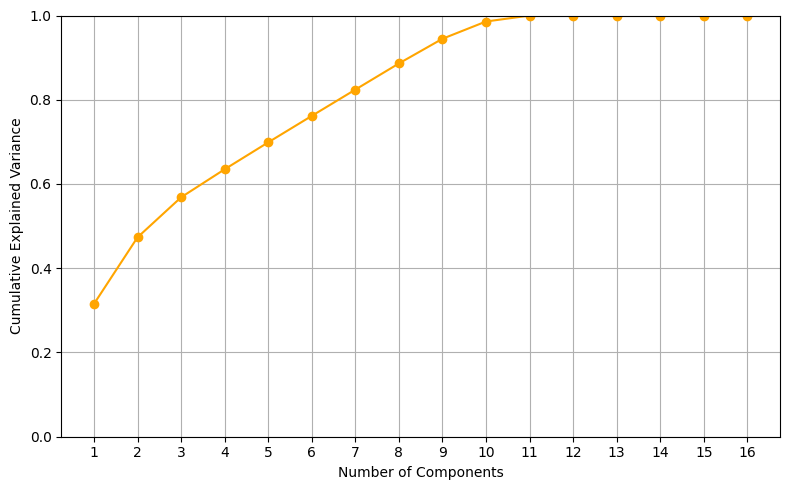

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` has already been fitted
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Specify the component number (e.g., n = 4)
n = 5 # Change this to your desired component index
if n <= len(cumulative_variance):
    print(f"Cumulative explained variance at component {n}: {cumulative_variance[n-1]:.4f}")
else:
    print(f"Component {n} exceeds the total number of components ({len(cumulative_variance)}).")

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(np.arange(1, len(cumulative_variance) + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


HEATMAP OF EACH INDICATOR AGAINST THE PCS

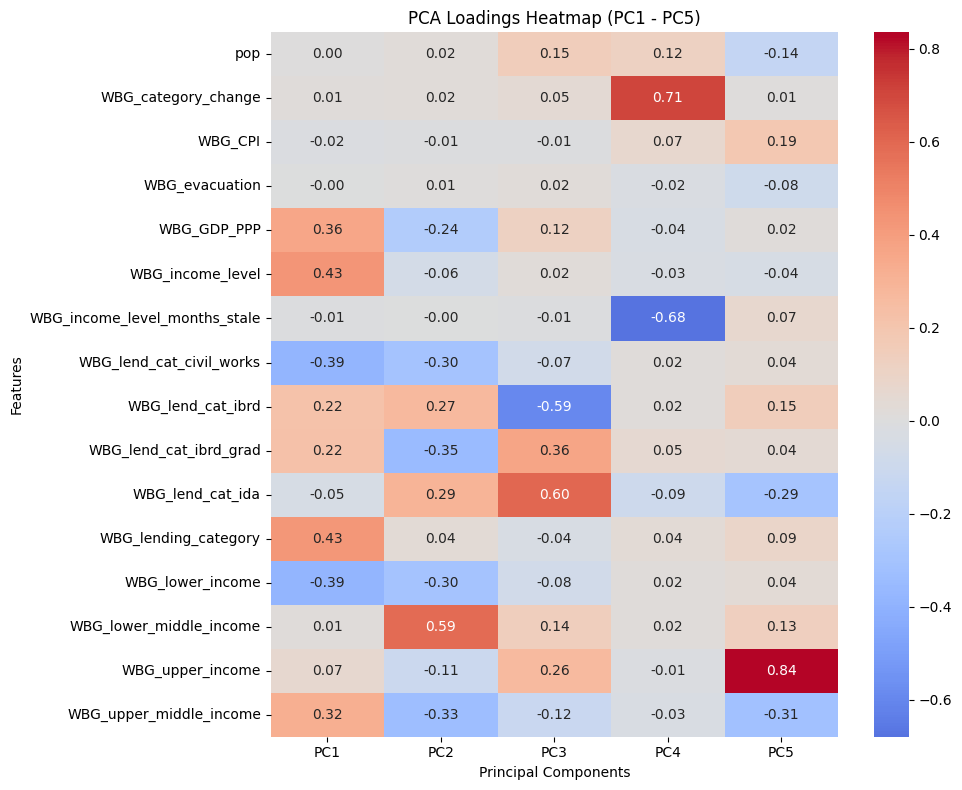

In [4]:

# Plot heatmap
plt.figure(figsize=(10, len(loadings) * 0.5))
sns.heatmap(loadings.iloc[:, :5], cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title('PCA Loadings Heatmap (PC1 - PC5)')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [6]:
pc_df = pd.DataFrame(pc_scores[:, :5], columns=[f'WBG_PC{i+1}' for i in range(5)])

# Add the corresponding iso3 values (must drop rows with NA just like df_clean)
iso3_cleaned = df['iso3'].loc[df_clean.index].reset_index(drop=True)
pc_df['iso3'] = iso3_cleaned

# Export to CSV
pc_df.to_csv('wbg_pca_top5.csv', index=False)
print("✅ Saved IMF PCA Top 5 components with ISO3 to 'imf_pca_top5.csv'")


✅ Saved IMF PCA Top 5 components with ISO3 to 'imf_pca_top5.csv'


PHYSICAL INTERPRETATION
WBG 
PC1: Structural Economic Status and Lending Profile
➡ Interpretation: This component separates countries based on their income and lending structure.
Higher PC1 scores indicate wealthier economies receiving non-civil-works-based loans (e.g., IBRD), whereas lower scores correspond to lower-income countries more dependent on civil works lending.

🔹 PC2: Lending Category and Economic Class Alignment
➡ Interpretation: Reflects a lending classification axis, highlighting the contrast between transitional economies (using IDA/IBRD lending) and mature economies (IBRD graduated).

🔹 PC3: Aid Type and Inflation Impact
➡ Interpretation: This component may capture variation in economic stress and aid mechanisms — e.g., the kind of aid a country receives (IDA vs IBRD) correlating with inflation levels (CPI).

🔹 PC4: Category Change vs. Data Recency
➡ Interpretation: Likely reflects recent reclassification vs. data staleness — distinguishing countries recently recategorized by World Bank from those with outdated income group data.

🔹 PC5: CPI vs. Population Pressure
➡ Interpretation: This PC contrasts macroeconomic pressure (inflation) with population-heavy, lower-income countries receiving infrastructure lending.
